In [10]:
# source: https://github.com/carlosgorlongaiatto/LabLOCP_A_Project/blob/main/project.ipynb

In [5]:
import plotly.express as px
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("dataset.csv", infer_datetime_format=True, parse_dates=True)
df

,rms,eventID,location,latitude,longitude,depth,magnitude,country,province,district,date,idsource
0,0.00,237968,Mengen (Bolu),41.000,32.000,7.00,3.72610,Türkiye,Bolu,Mengen,1990-01-06 12:59:39.000000,NAF02
1,0.00,237972,Merkez (Sivas),39.740,36.960,1.00,3.96451,Türkiye,Sivas,Merkez,1990-01-08 10:44:47.640000,NAF03
2,0.00,237974,Göynük (Bolu),40.370,30.810,7.00,3.09034,Türkiye,Bolu,Göynük,1990-01-17 15:49:11.630000,NAF01
3,0.00,237980,Sungurlu (Çorum),40.270,34.480,1.00,3.80557,Türkiye,Çorum,Sungurlu,1990-01-29 15:33:14.000000,NAF04
4,0.00,237985,Mengen (Bolu),41.000,32.000,4.00,3.72610,Türkiye,Bolu,Mengen,1990-02-02 22:07:34.000000,NAF02
...,...,...,...,...,...,...,...,...,...,...,...,...
41222,0.59,542319,Tosya (Kastamonu),40.922,33.826,7.00,2.19075,Türkiye,Kastamonu,Tosya,2023-01-23 00:01:21.000,NAF02
41223,0.38,542320,Merkez (Bayburt),40.107,40.492,15.12,2.59550,Türkiye,Bayburt,Merkez,2023-01-23 00:53:19.000,NAF03
41224,0.69,542327,Otlukbeli (Erzincan),40.043,40.019,7.01,2.27170,Türkiye,Erzincan,Otlukbeli,2023-01-23 02:46:50.000,NAF03
41225,0.66,542331,Marmara Denizi - [25.05 km] Silivri (İstanbul),40.841,28.270,7.01,2.91930,Türkiye,İstanbul,Silivri,2023-01-23 03:53:59.000,NAF01


In [3]:
df.magnitude = df.magnitude.round(1)
df.date = pd.to_datetime(df.date)
df = df[df['date'] < '2023-01-01']

In [6]:
magnitudes = np.arange(2, 8, 0.2)
counts = np.zeros(magnitudes.shape[0])

In [7]:
i = 0
for m in magnitudes:
    counts[i] = df[df['magnitude'] >= m]['magnitude'].count()
    i += 1

In [9]:
# normalize counts
norm = np.sum(counts)   
counts_n = counts/norm

In [11]:
# filter by removing empty bins for the log plot
counts_n_f = counts_n[counts_n!=0]
magnitudes_f = magnitudes[counts_n!=0]

In [14]:
# compute linear regression
reg = stats.linregress(magnitudes_f, np.log10(counts_n_f))

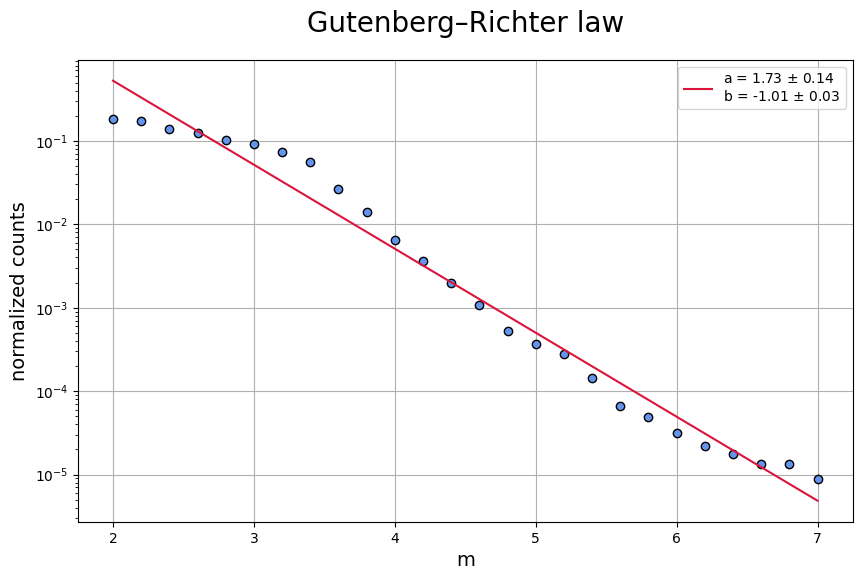

In [22]:
# Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
# plot histogram
ax.plot(magnitudes_f, counts_n_f, 'o', mfc='cornflowerblue', mec='black')
# plot linear regression
label = r'a = {:.2f} $\pm$ {:.2f}'.format(reg.intercept, reg.intercept_stderr) + '\n' + r'b = {:.2f} $\pm$ {:.2f}'.format(reg.slope, reg.stderr)
plt.plot(magnitudes_f, 10**(reg.intercept + reg.slope*magnitudes_f), 'crimson', label=label)
ax.set_yscale('log')
ax.set_xlabel('m', fontsize=14)
ax.set_ylabel(r'normalized counts', fontsize=14)
ax.set_title('Gutenberg–Richter law', fontsize=20, pad=20)
plt.legend()
plt.grid()
plt.show()